In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import xarray as xr
import warnings
from scipy import stats
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [177]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
rand_idx = np.random.randint(0,3939840, 92160)

#3939840 ~ 4Million data points

In [184]:
norm = xr.load_dataset('data\\VerySmallDataset\\000_norm.nc')
validation_ds = xr.load_dataset('data//VerySmallDataset/000_valid.nc')
#subset for analysis
randomized_ds = validation_ds['vars'][rand_idx,:]
randomized_ds.to_netcdf('data//VerySmallDataset/000_valid_subset.nc')
del validation_ds

In [186]:
ds = xr.load_dataset('data//VerySmallDataset/000_valid_subset.nc')

In [187]:
labels = [(np.where(ds.var_names == x),x) for x in ['TBP', 'QBP', 'PS', 'SOLIN', 'SHFLX', 'LHFLX','PRECT']]

In [188]:
labels

[((array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
          47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64),),
  'TBP'),
 ((array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
          17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64),),
  'QBP'),
 ((array([60], dtype=int64),), 'PS'),
 ((array([61], dtype=int64),), 'SOLIN'),
 ((array([62], dtype=int64),), 'SHFLX'),
 ((array([63], dtype=int64),), 'LHFLX'),
 ((array([128], dtype=int64),), 'PRECT')]

### Assumed Spatial and Temporal independence

Text(0, 0.5, 'Precipitation (mm/day)')

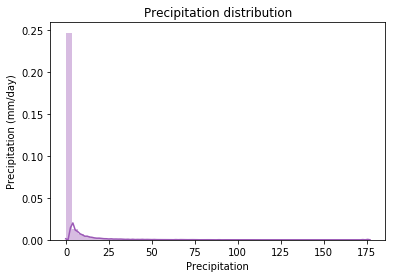

In [189]:
prect = pd.Series(ds['vars'][:,128] * 86400000, name="Precipitation") #mm/day
chart_prect = sns.distplot(prect)
chart_prect.set_title('Precipitation distribution')
chart_prect.set_ylabel('Precipitation (mm/day)')

1mm rainfall means every one square meter area is filled with the water of height 1mm.
1 square meter = 1000mm length ×1000mm breath
So 1mm rain means 1000mm length × 1000mm breath × 1mm height = 1litre of water.
Every square meter has one litre of water
In laymen language:
Take a vessel of 1 square meter in dimention and keep it in an open space during rain, you will be having 1mm height of water in it that is 1 litre of water in it at the end of the rain.

Text(0, 0.5, 'PS (surface pressure in Pa, 1 variable)')

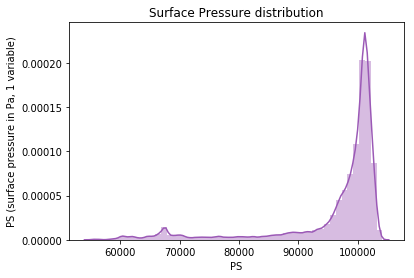

In [105]:
pressure = pd.Series(ds['vars'][:,60], name="PS") 
chart_press = sns.distplot(pressure)
chart_press.set_title('Surface Pressure distribution')
chart_press.set_ylabel('PS (surface pressure in Pa, 1 variable)')

Text(0, 0.5, 'SOLIN')

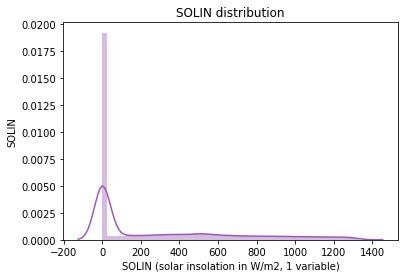

In [106]:
pressure = pd.Series(ds['vars'][:,61], name="SOLIN (solar insolation in W/m2, 1 variable)") 
chart_solin= sns.distplot(pressure)
chart_solin.set_title('SOLIN distribution')
chart_solin.set_ylabel('SOLIN')

Text(0, 0.5, 'SHFLX')

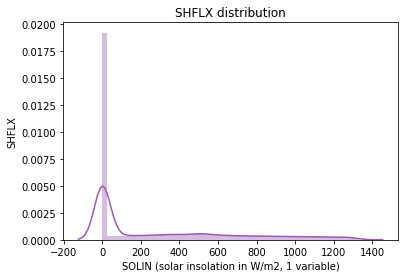

In [107]:
shflx = pd.Series(ds['vars'][:,62], name="SHFLX (surface sensible heat flux in W/m2, 1 variable),") 
chart_shflx = sns.distplot(pressure)
chart_shflx.set_title('SHFLX distribution')
chart_shflx.set_ylabel('SHFLX')

Text(0, 0.5, 'LHFLX')

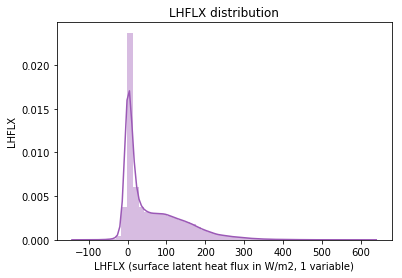

In [108]:
lhflx = pd.Series(ds['vars'][:,63], name="LHFLX (surface latent heat flux in W/m2, 1 variable)") 
chart_lhflx = sns.distplot(lhflx)
chart_lhflx.set_title('LHFLX distribution')
chart_lhflx.set_ylabel('LHFLX')

"
Yes: Most of the water condenses in the troposphere (lowest layer of the atmosphere with pressures lev usually below 150hPa ), which means that TBP[:12] and QBP[:12] should have a minor influence on PRECT compared to TBP[12:30] and QBP[12:30]
"

Text(0.5, 1.0, 'TBP, Level 0-11 (Higher layers (Far away from surface))')

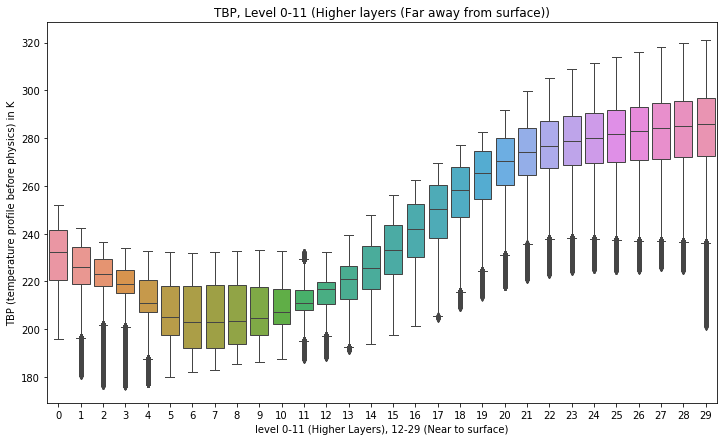

In [110]:
"TBP : Range [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]"

TBP = pd.DataFrame(np.array(ds['vars'][:,np.arange(30)+[30]])).melt()

TBP['High_Low'] = TBP["variable"].apply(lambda x : "Higher Layers" if x < 12 else "Lower layers Nearer to surface")



plt.figure(figsize=(12,7))
ax = sns.boxplot(x="variable", y="value",
               data=TBP, linewidth=1)
ax.set_xlabel("level 0-11 (Higher Layers), 12-29 (Near to surface)")
ax.set_ylabel("TBP (temperature profile before physics) in K")
ax.set_title("TBP, Level 0-11 (Higher layers (Far away from surface))")

Text(0.5, 1.0, 'QBP, Level 0-11 (Higher layers (Far away from surface))')

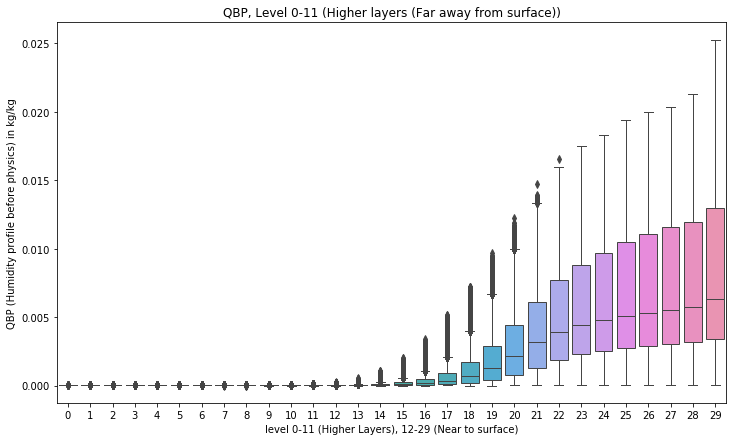

In [111]:
#(specific humidity profile before physics in kg/kg, 30 variables),
QBP = pd.DataFrame(np.array(ds['vars'][:,np.arange(0,30)])).melt()

QBP['High_Low'] = QBP["variable"].apply(lambda x : "Higher Layers" if x < 12 else "Lower layers Nearer to surface")

plt.figure(figsize=(12,7))
ax = sns.boxplot(x="variable", y="value",
               data= QBP, linewidth=1)
ax.set_xlabel("level 0-11 (Higher Layers), 12-29 (Near to surface)")
ax.set_ylabel("QBP (Humidity profile before physics) in kg/kg")
ax.set_title("QBP, Level 0-11 (Higher layers (Far away from surface))")

#### VAE Decoder

In [232]:
import json
import torch
import numpy as np
import torch.nn as nn
from models import CVAE
from sklearn import metrics
import torch.optim as optim
import torch.nn.functional as F
from __dataset import spcamDataset
from __dataset import SubsetSampler
import seaborn as sns
from torch.utils.data import DataLoader

params = {
        'data_fn' : 'data/VerySmallDataset/000_train.nc',
        'input_vars' : ['TBP', 'QBP', 'PS', 'SOLIN', 'SHFLX', 'LHFLX'],
        'output_vars' : ['PRECT'],
        'norm_fn':'data/VerySmallDataset/000_norm.nc',
        'input_transform':("min", "maxrs"),
        'batch_size': 1024,
        'shuffle' : False, 
        'var_cut_off': None,
        'model_type':"regression", ## dataset related

        'inputDim' : 64,
        'hiddenDim' : [32,32], ## Symmetrical
        'outputDim' : 32, #Hidden state #VAE related


        'epochs' : 30,
        'expNumber' : "VAE_Exp05", # to be changed
        'device' : 'cuda',
        'valid_fn' : 'data/VerySmallDataset/000_valid_subset.nc' #Misc
    }

model = CVAE(params)
optimizer = optim.Adam(model.parameters(),lr=0.00001,weight_decay=0.001)

### Load model
checkpoint = torch.load('./runs/VAE_model_DNN_classifier_exp_VAE_Exp05.pt')

model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

model.cuda()

model.eval()

CVAE(
  (encoder): Encoder(
    (model): Sequential(
      (hidden_0): Linear(in_features=65, out_features=32, bias=True)
      (hidden_bn_0): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (hidden_activation_0): RReLU(lower=0.125, upper=0.3333333333333333)
      (hidden_1): Linear(in_features=32, out_features=32, bias=True)
      (hidden_bn_1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (hidden_activation_1): RReLU(lower=0.125, upper=0.3333333333333333)
    )
    (mu): Linear(in_features=32, out_features=32, bias=True)
    (var): Linear(in_features=32, out_features=32, bias=True)
  )
  (decoder): Decoder(
    (model): Sequential(
      (hidden_0): Linear(in_features=96, out_features=32, bias=True)
      (hidden_bn_0): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (hidden_activation_0): RReLU(lower=0.125, upper=0.3333333333333333)
      (hidden_1): Linear(in_feature

In [233]:
'''
for batch_idx, (data, target) in enumerate(valid_loader):
    if batch_idx == 0:
        break
    
'''

valid_dataset = spcamDataset(params, phase = "validation")
valid_loader = DataLoader(valid_dataset, sampler = SubsetSampler(valid_dataset.indices))

In [266]:
def get_var_idx(ds, x = "PRECT"):
    return np.where(ds.var_names == x)

def rescale_prect_norm(ds, values, x = "PRECT"):
    
    idx = get_var_idx(ds, x)
    mean, std, mi,mx = norm['mean'][idx].data[0], \
            norm['std'][idx].data[0], norm['min'][idx].data[0],norm['max'][idx].data[0]
    
    
    return values * (mx-mi)+mi

def predict_prect(ds, valid_loader):
    samples = []
    
    model.cuda()
    model.eval()
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(valid_loader):

            z = torch.randn(params['batch_size']*10, params['outputDim'])
            #print(data.squeeze(0).shape)
            z = torch.cat((z, data.squeeze(0)), dim=1).cuda().data

            samples.extend(model.decoder(z).detach().cpu().numpy().flatten())    


    return rescale_prect_norm(ds, np.array(samples), "PRECT")


    #samples.extend(model.decoder(dp).detach().cpu().numpy()

In [267]:
predicted_precit = rescale_prect_norm(ds, predict_prect(ds, valid_loader), "PRECT")

In [268]:
def binned_boxplots(X_data, Y_data_1, Y_data_2):
    # Divide the X_data to get bin cutoffs
    # bins = np.arange(np.amax(X_data), np.amin(X_data), (np.amax(X_data) - np.amin(X_data))/20)
    bins = np.linspace(np.amin(X_data), np.amax(X_data), 20)
    
    # Generate bin labels for Y_data
    Y_data_1_binned = np.digitize(X_data, bins)
    #Y_data_2_binned = np.digitize(Y_data_2, bins)
    
    Y_data_1_labeled = pd.DataFrame(data=np.array([Y_data_1, Y_data_1_binned]).T, columns=['value', 'bin'])
    Y_data_1_labeled['label'] = "Actual - Precipitation"
    Y_data_2_labeled = pd.DataFrame(data=np.array([Y_data_2, Y_data_1_binned]).T, columns=['value', 'bin'])
    Y_data_2_labeled['label'] = "VAE - Precipitation"
    
    
    Y_data = pd.concat([Y_data_1_labeled, Y_data_2_labeled])

    plt.figure(figsize=(12, 7))
    ax = sns.boxplot(x='bin', y='value', data= Y_data, hue='label', linewidth=1,showfliers=False)
    ax.set_xlabel('QBP Bins')
    ax.set_ylabel('PRECT Values')
    ax.set_title('Distribution of PRECT Values from Different Nets by QBP Range')
    
    #return Y_data

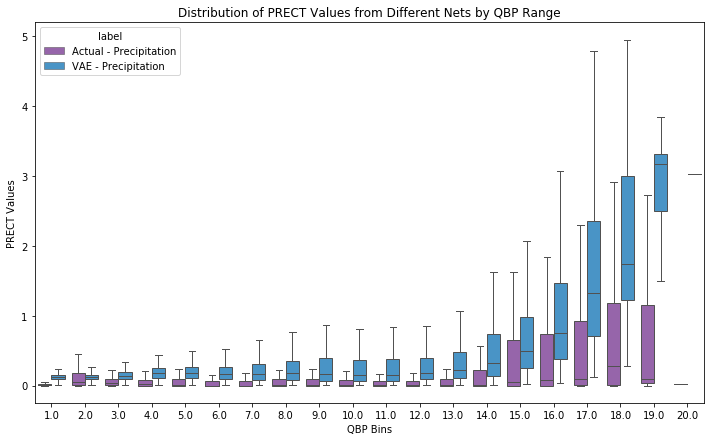

In [269]:
binned_boxplots(ds['vars'][:,25].data,ds['vars'].data[:,128] * 8640000, predict_prect(ds, valid_loader) * 8640000)